### 2値画像処理
カメラで撮影した画像は、一般にカラー画像で取り込まれるが、処理したい対象物の情報を得るために、グレースケール画像に変換した後、さらに２値画像に変換して処理することが多い。

#### 2値化
グレースケール画像は0～255なので白黒の間の中間色が存在する。
その中間地をなくし白と黒の２値に変換することを２値化と呼ぶ。
* p-タイル法(p-tile method)
* モード法
* 判別分析法

#### 輪郭

#### オープニング・クロージング
http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html




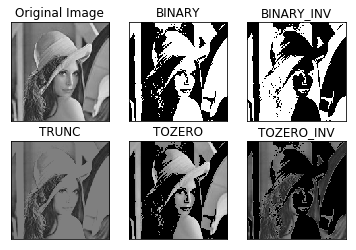

In [2]:
#２値化
import cv2
import numpy as np
from matplotlib import pyplot as plt

# cv2.threshold(img, thresh, maxVal, type) 
img = cv2.imread('./Images/gray_Lenna.jpg')
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

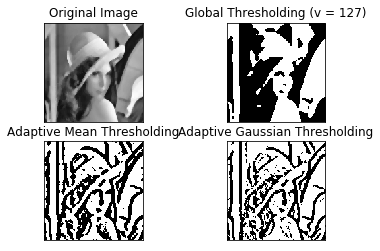

In [3]:
#threshold メソッドでは閾値を指定して、画像全体に対して 2 値化をしている。
#これだと撮影条件により画像領域で異なる光源環境となるような画像に対しては期待する結果が得られない．
#これに対して、adaptiveThreshold メソッドを用いれば、あるピクセルを 2 値化したい場合、
#そのピクセルを中心とする n×n ピクセルのデータを用いて、閾値計算を行い2 値化を行う。
#閾値は、指定範囲内の平均値 ADAPTIVE_THRESH_MEAN_C 
#または標準化した平均値 ADAPTIVE_THRESH_GAUSSIAN_C を選ぶことができる。

img = cv2.imread('gray.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

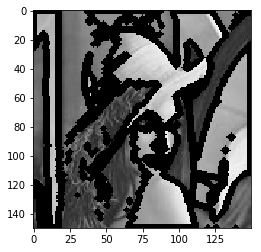

In [11]:
#OpenCVの輪郭検出は，黒い背景から白い物体の輪郭を検出することと仮定している．
#物体は白(明るい色)，背景は黒(暗い色)と覚えておこう．
import numpy as np
import cv2

im = cv2.imread('./Images/Lenna.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(imgray, contours, -1, (0,255,0), 3)

plt.imshow(img, cmap='gray')
plt.show()

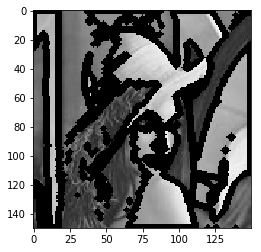

In [18]:
cnt = contours[10]
img = cv2.drawContours(imgray, [cnt], 0, (0,255,0), 3)
plt.imshow(img, cmap='gray')
plt.show()